<a href="https://colab.research.google.com/github/zzoeys/freecakefridays/blob/main/preparing_georgia_county_shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install the required libraries.


*   The descartes library allows us to work with shapefiles [(descartes, 2017)](https://pypi.org/project/descartes/)
*   The geopandas library allows us to work with geospatial data [(GeoPandas, 2013)](https://geopandas.org/en/stable/)


*   The matplotlib library allows us to create visualizations [(Matplotlib — Visualization with Python, 2021)](https://matplotlib.org/)

*   The pandas library allows us to work with data in a dataframe [(pandas - Python Data Analysis Library, 2021)](https://pandas.pydata.org/)



In [ ]:
!pip install descartes
!pip install geopandas
!pip install matplotlib
!pip install pandas

     |████████████████████████████████| 1.0 MB 15.4 MB/s 
     |████████████████████████████████| 15.4 MB 53.0 MB/s 
     |████████████████████████████████| 6.3 MB 55.0 MB/s 


Import the required libraries.

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

The shapefile consists of the boundaries for every state of the United States. 

The shapefile was downloaded from the following source: [(US Census Bureau, 2021)](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=Counties+%28and+equivalent%29)

In [ ]:
geoData = "tl_2020_us_county.shp"
map_geo = gpd.read_file(geoData)
map_geo.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


As our exploration focuses on Georgia, only Georgia's data is extracted. This is identified by '13' in the 'STATEFP' column.

In [ ]:
# Georgia is identified by '13' in the 'STATEFP' column of the geodataframe. 
county_geo=map_geo.loc[map_geo['STATEFP']=='13']

#  The county name column is capitalized to help with later merging.
county_geo['NAME'] = county_geo['NAME'].str.upper()
county_geo.head()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
15,13,189,00348794,13189,MCDUFFIE,McDuffie County,06,H1,G4020,None,12260,None,A,666590014,23114032,+33.4806126,-082.4795333,"POLYGON ((-82.44998 33.34051, -82.45000 33.340..."
52,13,025,00351605,13025,BRANTLEY,Brantley County,06,H1,G4020,None,15260,None,A,1147972258,10291563,+31.1973339,-081.9829779,"POLYGON ((-81.91012 31.34722, -81.90993 31.347..."
53,13,171,00326713,13171,LAMAR,Lamar County,06,H1,G4020,122,12060,None,A,475264404,6044329,+33.0744405,-084.1466893,"POLYGON ((-84.24837 33.07856, -84.24837 33.079..."
82,13,115,00353665,13115,FLOYD,Floyd County,06,H1,G4020,122,40660,None,A,1320404595,22414013,+34.2636918,-085.2136851,"POLYGON ((-85.24134 34.41552, -85.24124 34.415..."
101,13,273,00352238,13273,TERRELL,Terrell County,06,H1,G4020,None,10500,None,A,869695791,4951325,+31.7771909,-084.4394464,"POLYGON ((-84.56317 31.77060, -84.57351 31.770..."


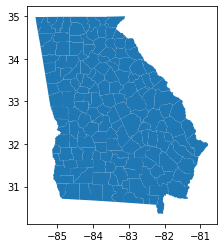

In [ ]:
county_geo.plot()

This step downloads the prepared geodataframe as a shapefile with only the county boundaries in Georgia. 

In [ ]:
# converts the shapefile to the World Geodetic System to save as shapefile.
county_geo.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

county_geo.to_file('georgia_county.shp', driver='ESRI Shapefile')

Citations:

Geopandas.org. 2013. GeoPandas. [online] Available at: <https://geopandas.org/en/stable/> [Accessed 10 September 2021].

Matplotlib.org. 2021. Matplotlib — Visualization with Python. [online] Available at: <https://matplotlib.org/> [Accessed 10 September 2021].

Pandas.pydata.org. 2021. pandas - Python Data Analysis Library. [online] Available at: <https://pandas.pydata.org/> [Accessed 10 September 2021].

PyPI. 2017. descartes. [online] Available at: <https://pypi.org/project/descartes/> [Accessed 10 September 2021].

US Census Bureau, 2022. 2020 TIGER/Line® Shapefiles. [online] Census.gov. Available at: <https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=Counties+%28and+equivalent%29> [Accessed 12 September 2021].